In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

### Clus1

In [3]:
df = pd.read_csv('clus1.csv',index_col=0)
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

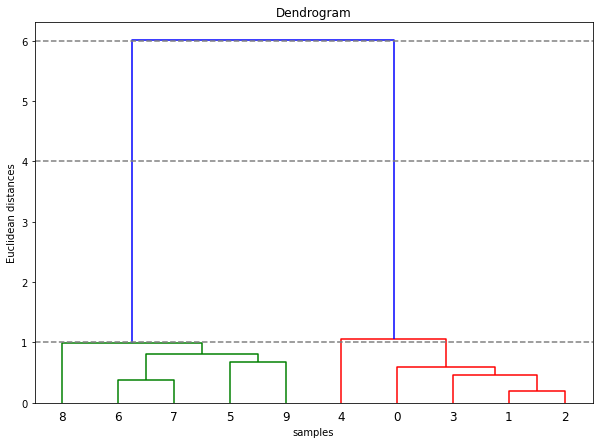

In [10]:
X = df.values

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distances')
plt.axhline(y=1, color='grey', linestyle='--')
plt.axhline(y=(6*2/3), color='grey', linestyle='--')
plt.axhline(y=6, color='grey', linestyle='--')
plt.show()

Kryterium opisane w udostępnionych artykułach umożliwia nam wybór optymalnej liczby klastrów. Wybieramy najwyższą pionową linię nie przecinającą się z inną linią. Nastepnie wyznaczam jej ekstrema i sprawdzam ile lini mieści się w tym zakresie na przestrzeni calego dendrogramu. Ich liczba = optymalna liczba klastrów. 

Jak widać na załączonym dendogramie, ciężko dokładne ustalić na jakiej wysokości powinny się znajdować ekstrema

Inną metodą jest odcięcie w 2/3 wysokości drzewa, co również pozwala nam wybrać optymalną liczbę klastrów

Liczba klastrów: 2 

In [11]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)


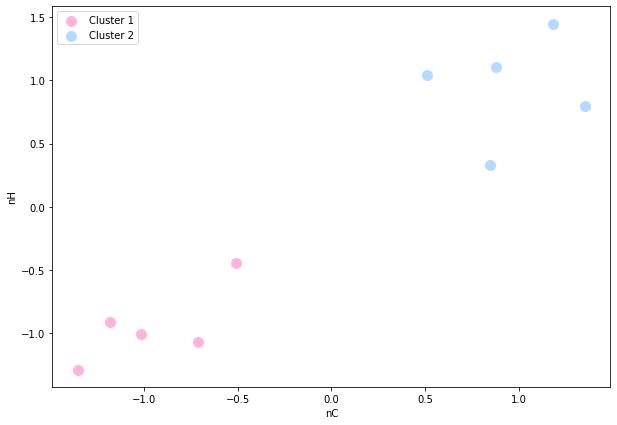

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='#ffb5da', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='#b5daff', label ='Cluster 2')
plt.xlabel('nC')
plt.ylabel('nH')
plt.legend()
plt.show()

### Clus2

In [13]:
df_1 = pd.read_csv('clus2.csv',index_col=0)
df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1), columns=df_1.columns)
X_1 = df_1.values

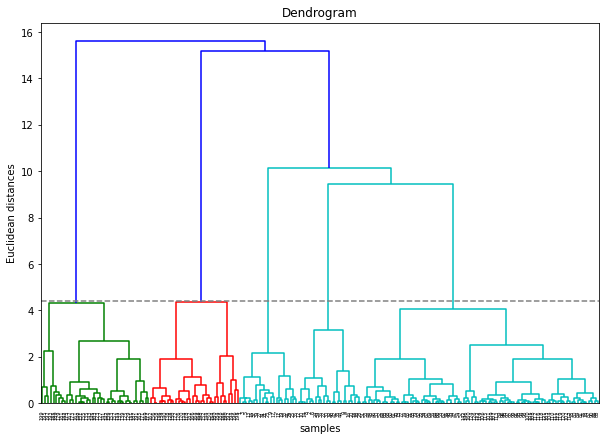

In [19]:
plt.figure(figsize=(10,7))
dendrogram_1 = sch.dendrogram(sch.linkage(X_1, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distances')
plt.axhline(y=4.4, color='grey', linestyle='--')
plt.show()

Number of clusters: 5

In [23]:
hc_1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc_1=hc_1.fit_predict(X_1)

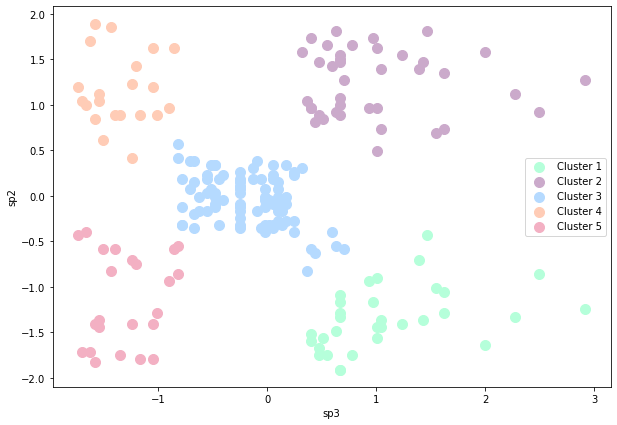

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(X_1[y_hc_1==0, 0], X_1[y_hc_1==0, 1], s=100, c='#b5ffda', label ='Cluster 1')
plt.scatter(X_1[y_hc_1==1, 0], X_1[y_hc_1==1, 1], s=100, c='#cbaacb', label ='Cluster 2')
plt.scatter(X_1[y_hc_1==2, 0], X_1[y_hc_1==2, 1], s=100, c='#b5daff', label ='Cluster 3')
plt.scatter(X_1[y_hc_1==3, 0], X_1[y_hc_1==3, 1], s=100, c='#ffccb6', label ='Cluster 4')
plt.scatter(X_1[y_hc_1==4, 0], X_1[y_hc_1==4, 1], s=100, c='#f3b0c3', label ='Cluster 5')
plt.xlabel('sp3')
plt.ylabel('sp2')
plt.legend()
plt.show()


### Clus3

In [35]:
df_2 = pd.read_csv('clus3.csv',index_col=0)
df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2), columns=df_2.columns)
X_2 = df_2.values

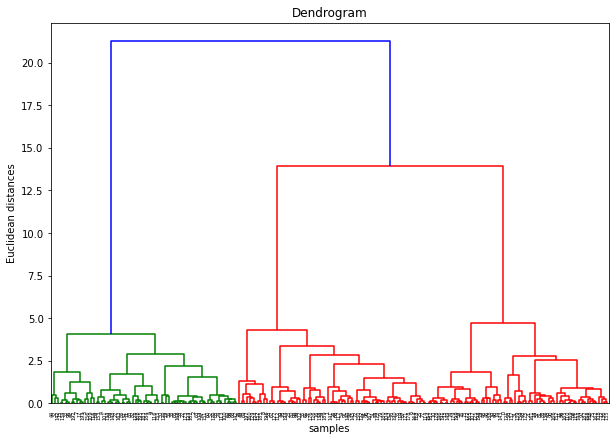

In [44]:
plt.figure(figsize=(10,7))
dendrogram_2 = sch.dendrogram(sch.linkage(X_2, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distances')
plt.show()

Number of clusters: 3

In [38]:
hc_2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc_2=hc_2.fit_predict(X_2)

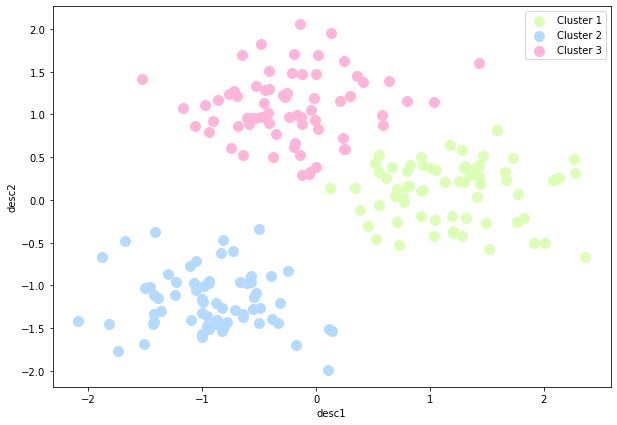

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(X_2[y_hc_2==0, 0], X_2[y_hc_2==0, 1], s=100, c='#daffb5', label ='Cluster 1')
plt.scatter(X_2[y_hc_2==1, 0], X_2[y_hc_2==1, 1], s=100, c='#b5daff', label ='Cluster 2')
plt.scatter(X_2[y_hc_2==2, 0], X_2[y_hc_2==2, 1], s=100, c='#ffb5da', label ='Cluster 3')
plt.xlabel('desc1')
plt.ylabel('desc2')
plt.legend()
plt.show()

### Wnioski

Na podstawie zestawienia uzyskanych wykresów z wykresami z poprzednich zajęć można zauważyć, że metoda HCA i metoda K-means dały nam taką samą liczbę klastrów dla każdego zbioru danych. 
Możemy jednak zauważyć różnicę w przypisaniu punktów do poszczególych klastrów:

  1. **Clus2** metoda HCA przypisała wszystkie punkty znajdujące się pomiędzy fiolotowym i czerwonym skupieniem, nie będace w ścisłym centrum klastra, do klastra fioletowego, podczas gdy algorytm K-means przypisał część z nich do klastra czerwonego. Inny punkt, przypisanych do fioletowego klastra przez HCA, został przypisany do klastra zielonego przez k-means.


 2. W **Clus3** również istnieją 3 punkty, które zostały przypisane przez metodę k-means do innego klastra.

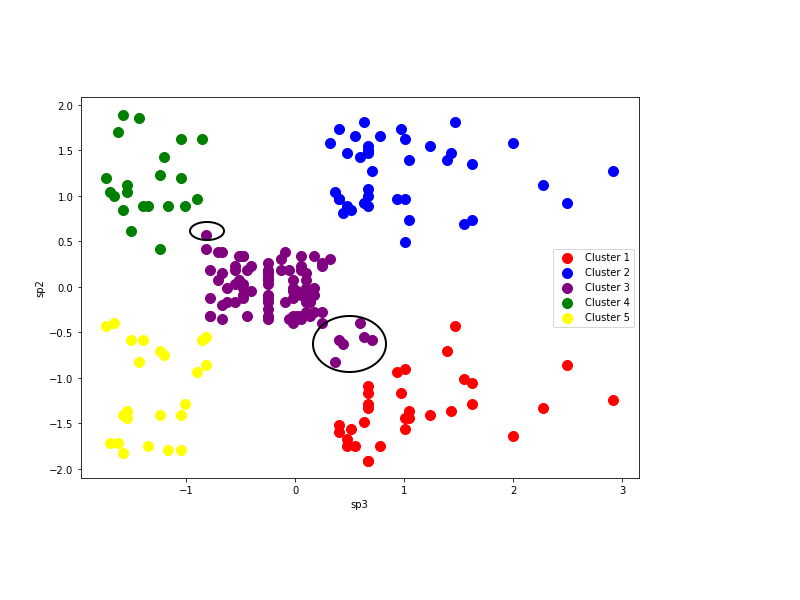

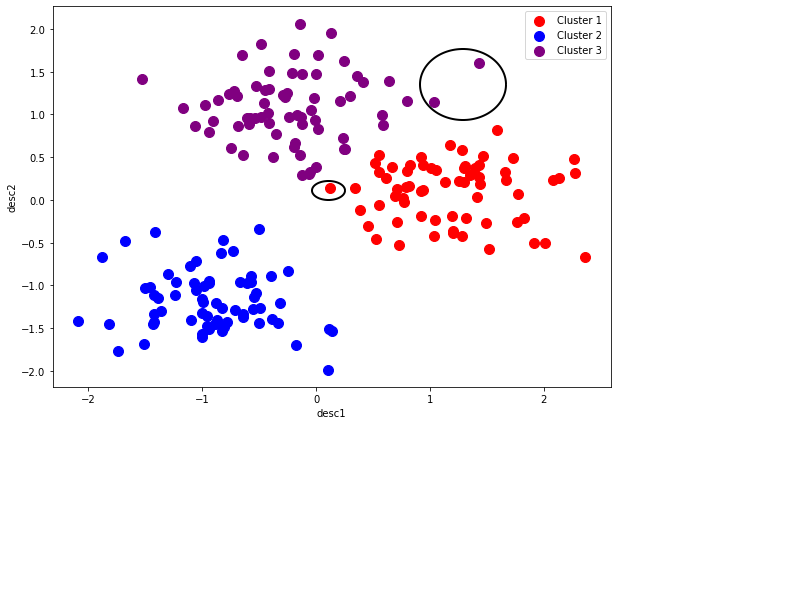